# Lab | Time Series Analysis

## Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [45]:
# Import numpy and pandas

import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

## Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [4]:
from google.colab import files

uploaded = files.upload()

Saving sub_1.csv to sub_1.csv


In [5]:
# Run this code:
sensor = pd.read_csv('sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [6]:
# Your code here:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [9]:
# Your code here:
sensor[sensor.isnull().any(axis=1)]

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z


How many rows and columns are in our data?

In [11]:
# Your code here:
print("Rows and columns:", sensor.shape)

Rows and columns: (1751, 12)


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [25]:
sensor.index = pd.date_range(
    start='2018-01-01 00:00:00',
    end='2018-01-01 00:29:10',
    periods=len(sensor)
)

Assign the time series index to the dataframe's index.

In [26]:
# Your code here:
sensor

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 00:29:06,1.797120,-0.562324,2.445889,0.824443,0.533154,0.189844,-0.123211,0.909536,-0.379757,-0.268367,0.006733,-0.064874
2018-01-01 00:29:07,1.814297,-0.569719,2.449655,0.817212,0.539396,0.203020,-0.057641,0.723118,-0.437812,-0.102444,-0.060666,-0.229738
2018-01-01 00:29:08,1.830821,-0.578367,2.447967,0.809207,0.546658,0.215288,0.343238,0.997236,-0.338155,-0.085590,-0.030209,-0.087740
2018-01-01 00:29:09,1.849557,-0.586962,2.439458,0.800485,0.553834,0.229110,0.470144,1.227937,-0.332223,-0.048105,0.029555,0.060441


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](./images/tsa_decompose.png)

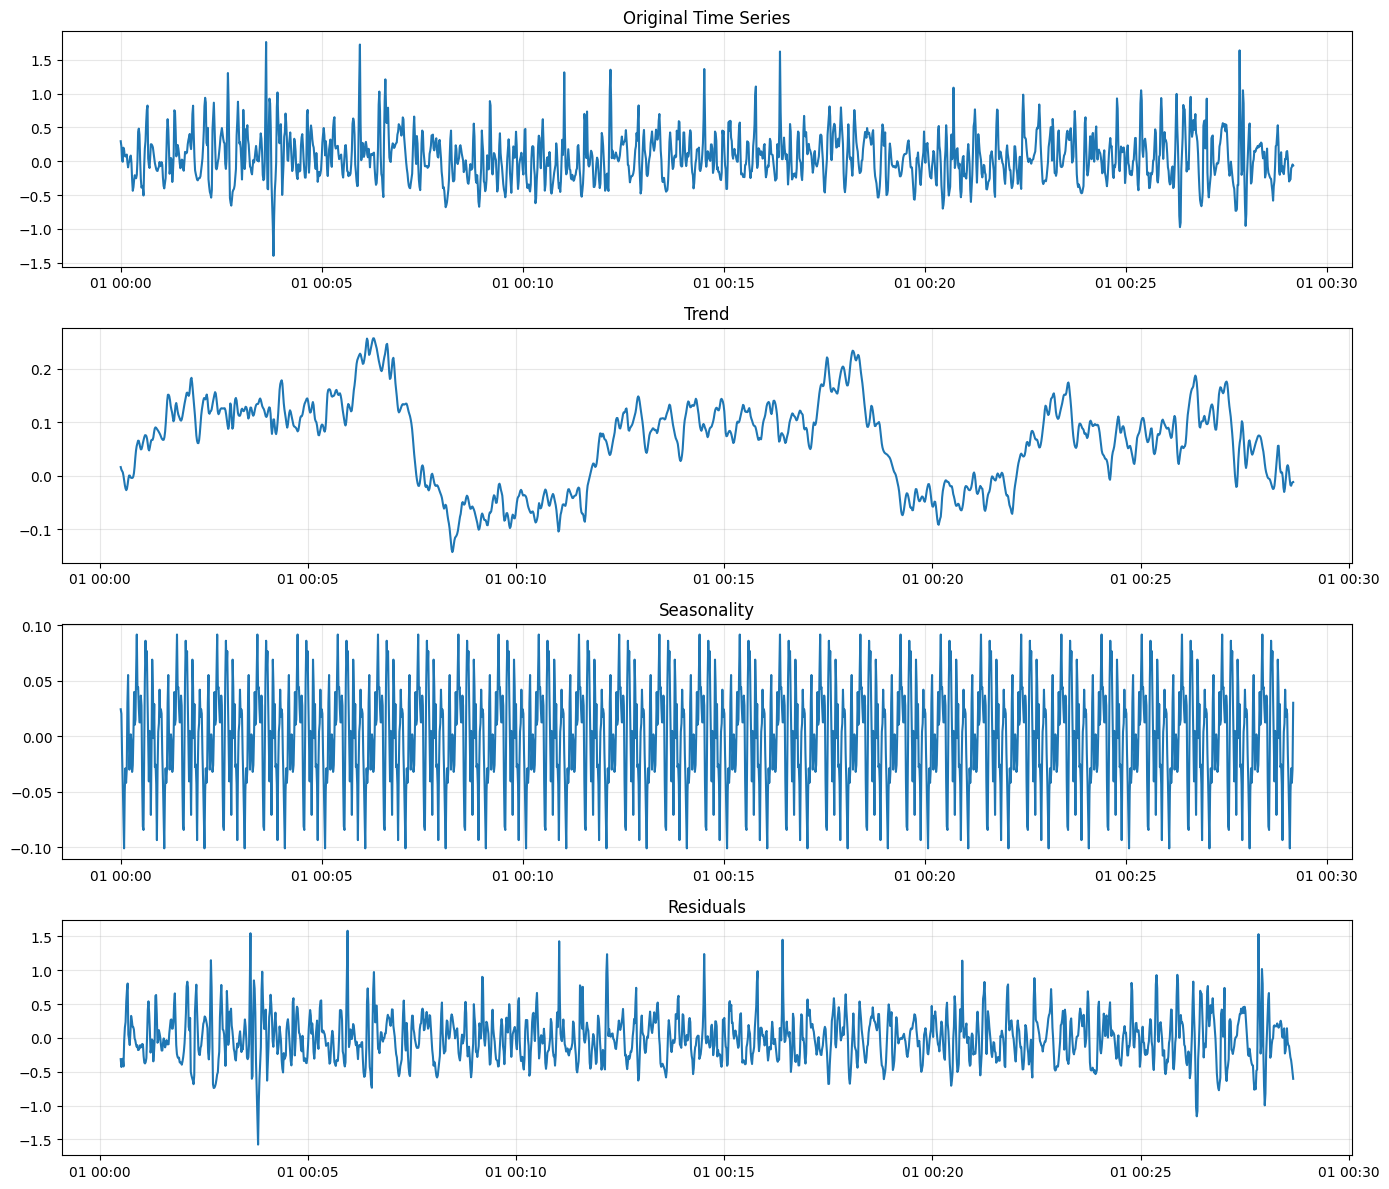

In [28]:
# Your code here:
import statsmodels.api as sm
import matplotlib.pyplot as plt


decomposition = sm.tsa.seasonal_decompose(
    sensor['userAcceleration.x'],
    model='additive',
    period=60
)

plt.figure(figsize=(14, 12))
plt.subplot(411)
plt.plot(decomposition.observed)
plt.title('Original Time Series')
plt.grid(True, alpha=0.3)

plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Trend')
plt.grid(True, alpha=0.3)

plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('Seasonality')
plt.grid(True, alpha=0.3)

plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('Residuals')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

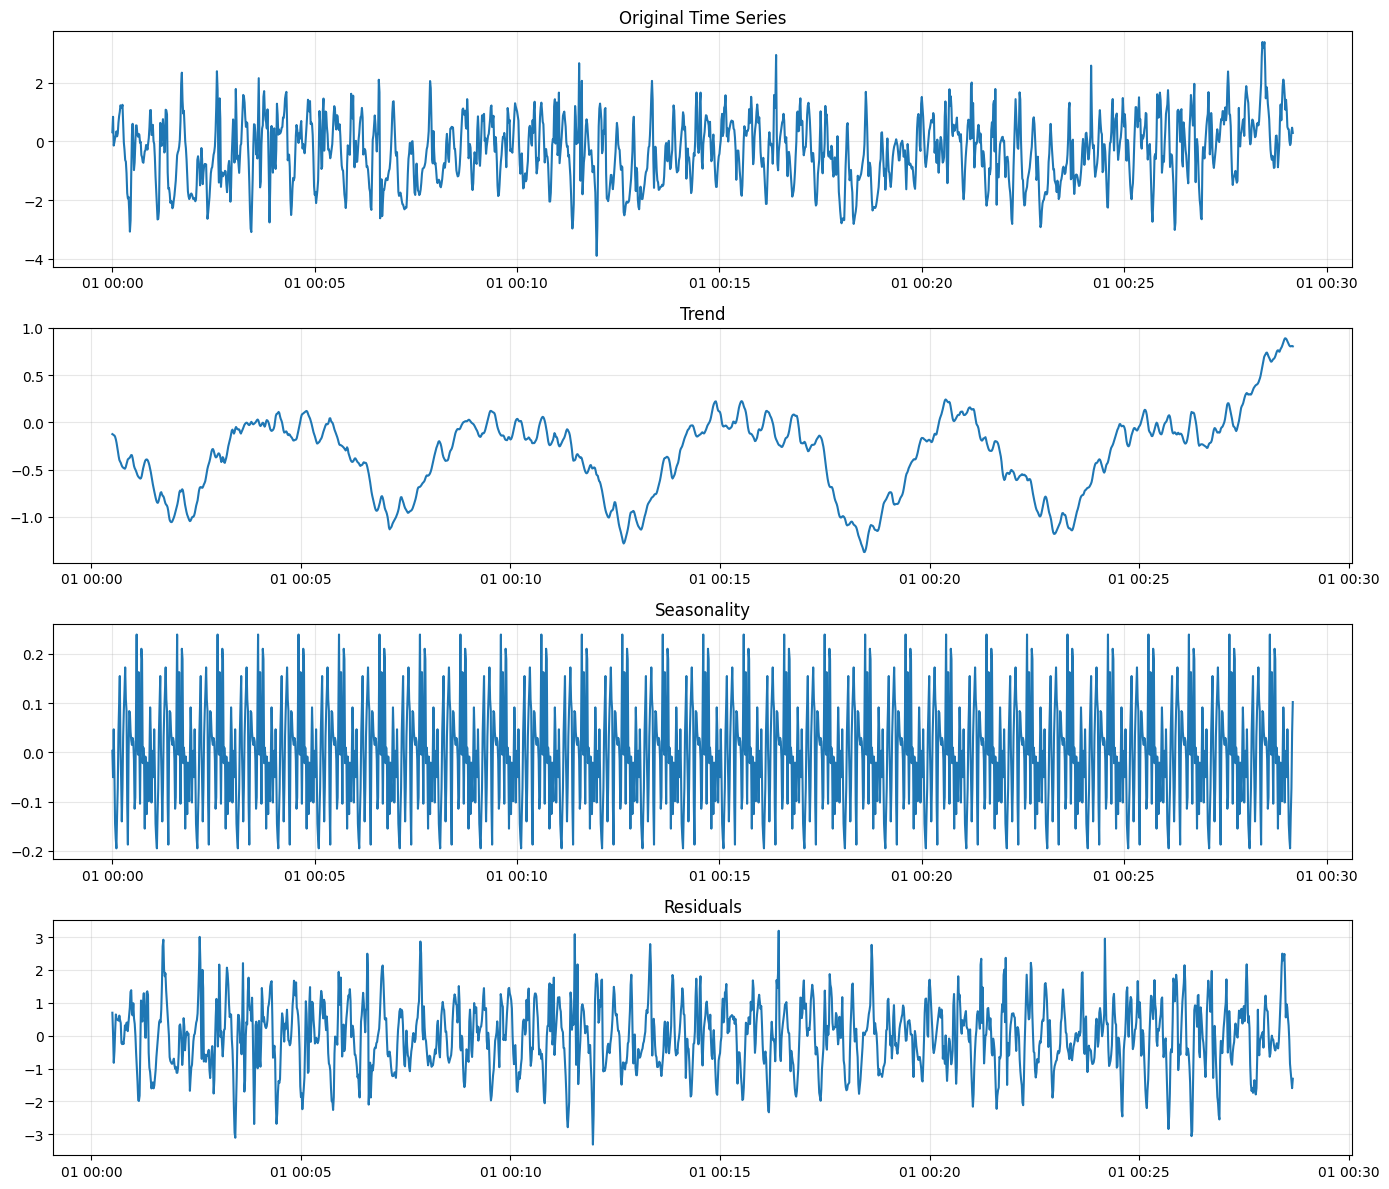

In [30]:
decomposition_rotation = sm.tsa.seasonal_decompose(
    sensor['rotationRate.x'],
    model='additive',
    period=60
)

plt.figure(figsize=(14, 12))
plt.subplot(411)
plt.plot(decomposition_rotation.observed)
plt.title('Original Time Series')
plt.grid(True, alpha=0.3)

plt.subplot(412)
plt.plot(decomposition_rotation.trend)
plt.title('Trend')
plt.grid(True, alpha=0.3)

plt.subplot(413)
plt.plot(decomposition_rotation.seasonal)
plt.title('Seasonality')
plt.grid(True, alpha=0.3)

plt.subplot(414)
plt.plot(decomposition_rotation.resid)
plt.title('Residuals')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

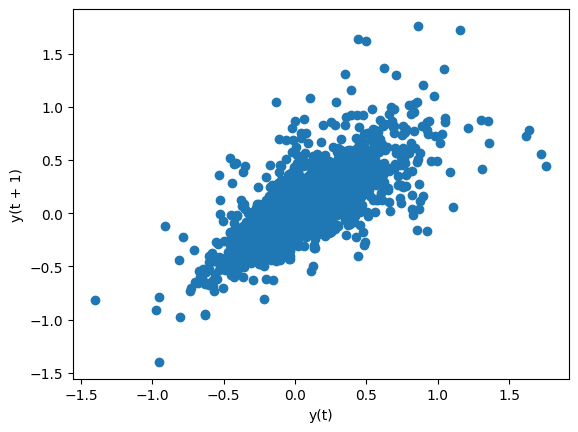

In [37]:
# Your code here:
from pandas.plotting import lag_plot

lag_plot(sensor["userAcceleration.x"], lag=1)

Create a lag plot for `rotationRate.x`

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

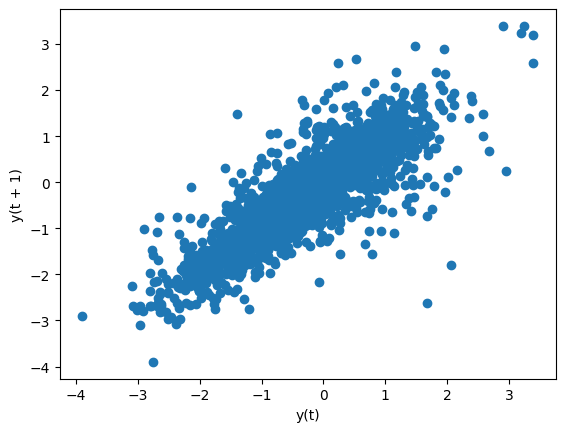

In [38]:
# Your code here:
lag_plot(sensor["rotationRate.x"], lag=1)

What are your conclusions from both visualizations?

In [ ]:
# Both rotationRate and userAcceleration time series exhibit strong autocorrelation,
# indicating that current values are strongly dependent on their immediate past values (lag 1).

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [44]:
# Augmented Dickey-Fuller Test for Stationarity on sensor, variable ["userAcceleration.x"]
sensor_user_acceleration = sensor["userAcceleration.x"]
sensor_rotation_rate = sensor["rotationRate.x"]

def perform_adf_test(series, title):
    print(f"\nADF Test for {title}:")
    result = adfuller(series.dropna())

    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')

    if result[1] < 0.05:
        print("Series is stationary (reject null hypothesis)")
    else:
        print("Series is non-stationary (fail to reject null hypothesis)")

variables = ["userAcceleration.x", "rotationRate.x"]

for var in variables:
    perform_adf_test(sensor[var], f"ADF test on sensor / {var}")


ADF Test for ADF test on sensor / userAcceleration.x:
ADF Statistic: -17.9580
p-value: 0.0000
Critical Values:
	1%: -3.4341
	5%: -2.8632
	10%: -2.5677
Series is stationary (reject null hypothesis)

ADF Test for ADF test on sensor / rotationRate.x:
ADF Statistic: -5.2699
p-value: 0.0000
Critical Values:
	1%: -3.4341
	5%: -2.8632
	10%: -2.5677
Series is stationary (reject null hypothesis)


What are your conclusions from this test?

In [ ]:
# Your conclusions here:
# Both series for the the variable userAcceleration.x and rotationRate.x are stationary.

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set.

In [66]:
# Your code here:
# ARIMA Modell fitten
arima_model = ARIMA(sensor["userAcceleration.x"], order=(10, 3, 10))
arima_results = arima_model.fit()
print("ARIMA Model Summary:")
print(arima_results.summary().tables[1])

# Forecast mit ARIMA
forecast_steps = 30
freq = sensor.index.inferred_freq

if freq is None:
    freq = '10S'  # manuell angeben, wenn None

# Forecast berechnen
forecast = arima_results.forecast(steps=forecast_steps)

# Forecast-Index erzeugen
forecast_index = pd.date_range(
    start=sensor.index[-1] + pd.Timedelta('10S'),
    periods=forecast_steps,
    freq=freq
)

forecast = pd.Series(forecast, index=forecast_index)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency s will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency s will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency s will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  

ARIMA Model Summary:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.9705      0.043    -68.735      0.000      -3.055      -2.886
ar.L2         -4.6374      0.097    -47.898      0.000      -4.827      -4.448
ar.L3         -4.8001      0.144    -33.302      0.000      -5.083      -4.518
ar.L4         -2.9670      0.168    -17.655      0.000      -3.296      -2.638
ar.L5         -1.1396      0.182     -6.263      0.000      -1.496      -0.783
ar.L6         -0.5495      0.196     -2.797      0.005      -0.935      -0.164
ar.L7         -0.5395      0.181     -2.980      0.003      -0.894      -0.185
ar.L8         -0.6052      0.131     -4.631      0.000      -0.861      -0.349
ar.L9         -0.2201      0.069     -3.188      0.001      -0.355      -0.085
ar.L10         0.0800      0.023      3.433      0.001       0.034       0.126
ma.L1          1.1876      0.05

<ipython-input-66-262f1231d7f2>:20: FutureWarning: 'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.
  start=sensor.index[-1] + pd.Timedelta('10S'),


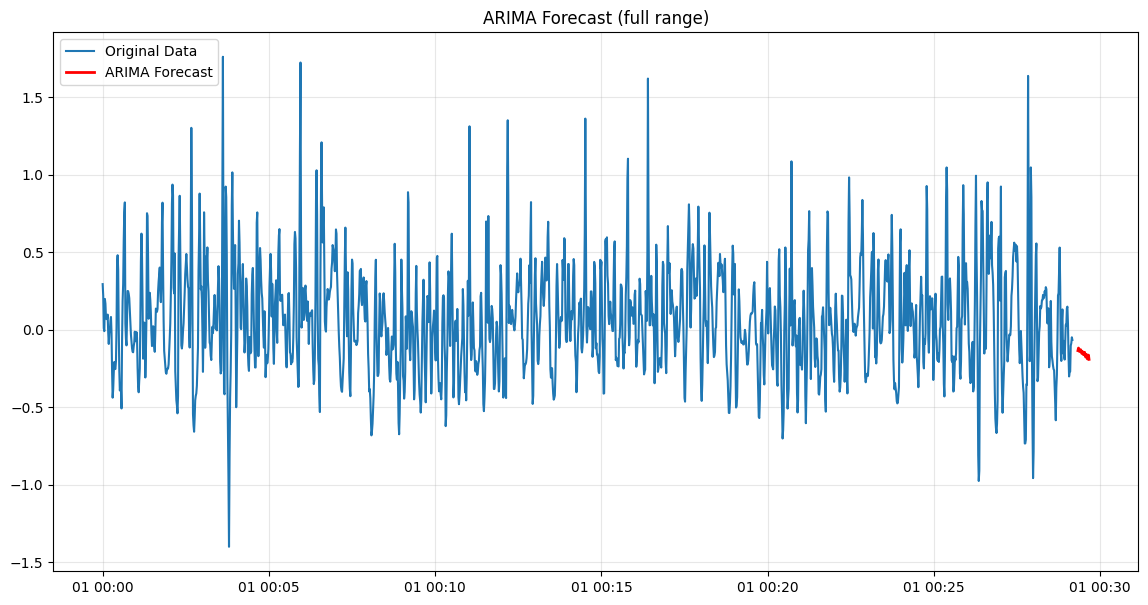

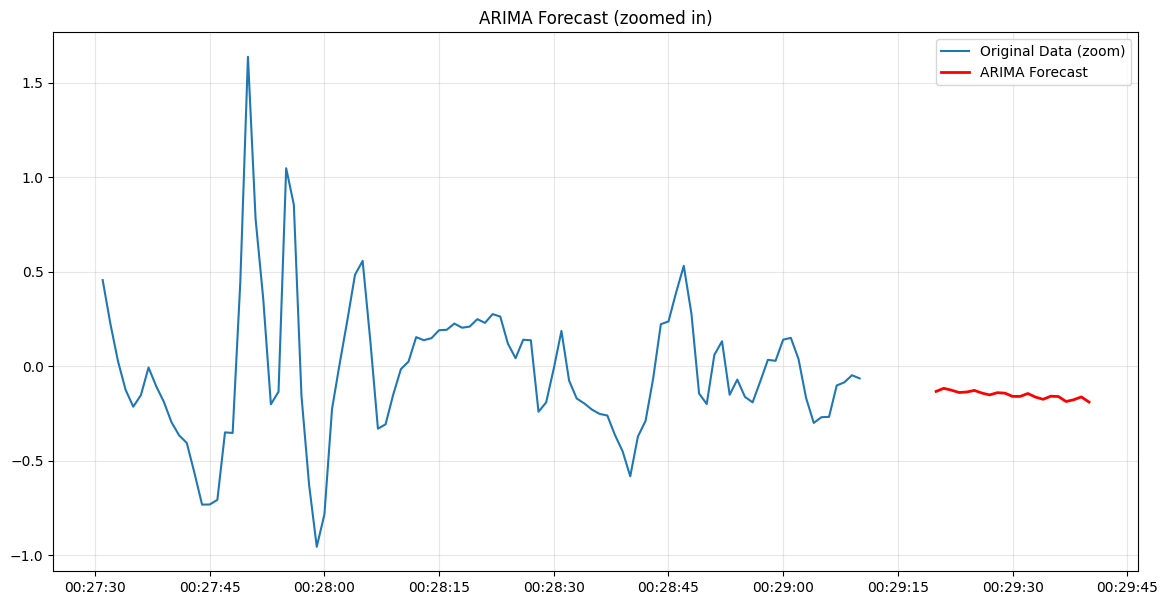

In [67]:
plt.figure(figsize=(14,7))

# Originaldaten
plt.plot(sensor["userAcceleration.x"], label='Original Data')

# Forecast
plt.plot(forecast, label='ARIMA Forecast', color='red', linewidth=2)

plt.title('ARIMA Forecast (full range)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Zoom auf Forecast-Bereich (letzte 100 Sekunden + Forecast)
plt.figure(figsize=(14,7))
start_zoom = sensor.index[-100]  # z.B. 100 Schritte vor Ende

plt.plot(sensor.loc[start_zoom:, "userAcceleration.x"], label='Original Data (zoom)')
plt.plot(forecast, label='ARIMA Forecast', color='red', linewidth=2)

plt.title('ARIMA Forecast (zoomed in)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [58]:
print(forecast.head())
print(forecast.min(), forecast.max())


2018-01-01 00:29:20    0.024533
2018-01-01 00:29:21    0.025204
2018-01-01 00:29:22    0.025772
2018-01-01 00:29:23    0.025885
2018-01-01 00:29:24    0.026668
Freq: s, Name: predicted_mean, dtype: float64
0.024532732203945307 0.027169192263916717


To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [68]:
# Your code here:
from statsmodels.tools.eval_measures import rmse

# Letzte 10 tatsächliche Werte
actual = sensor["userAcceleration.x"].iloc[-10:]

# Letzte 10 Vorhersagen des Modells
# Achtung: .predict() ist besser für "in-sample" als .forecast()
predicted = arima_results.predict(start=len(sensor)-10, end=len(sensor)-1, typ='levels')

# RMSE berechnen
error = rmse(actual, predicted)
print(f"RMSE (last 10 values): {error:.5f}")




RMSE (last 10 values): 0.06987


In [69]:
#Conclusion: The RMSE value of 0.06987 indicates that your model predicts the last 10 values reasonably well, assuming that the userAcceleration.x values fall within a typical range of approximately -1 to +1.